In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Define degree and weight list generators.

In [2]:
#generate random weight
def ran_weight(l, min, max):
    #l: length of the list
    #max/min: max/min of the list element
    randomlist = []
    for i in range(l):
        n = random.randint(min,max)
        randomlist.append(n)

    return randomlist

#generate random degree for simple connected diagram
def ran_deg(l, min=1 , max=None):
    #l: length
    #max/min: max/min of the degree
    max-=1
    list = []
    for i in range(l):
        n = random.randint(min,max)
        list.append(n)
    
    if sum(list)%2 != 0:
        k = int(random.random()*l)
        if list[k] == 1:       
            list[k] = list[k] + 1
        else:
            list[k] = list[k] - 1
    
    return list

Example for a random graph.

degree= [5, 1, 2, 5, 3, 2, 5, 4, 4, 3]
weight= [7, 10, 2, 2, 10, 4, 9, 1, 6, 3]
graph degree sequence [(0, 5), (1, 1), (2, 2), (3, 5), (4, 3), (5, 2), (6, 5), (7, 4), (8, 4), (9, 3)]


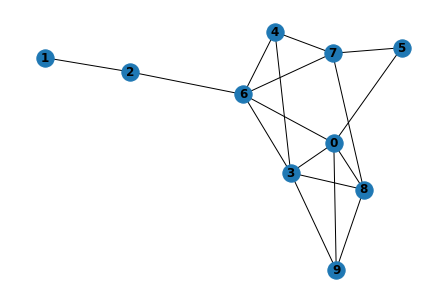

In [3]:
from Gphase import Gphase

length = 10
d_min = 2 #minimal degree, not suggested to be 1 for small d_max
d_max = 7 #maximal degree, where d_max < length, d_max not suggested to be small
w_min = 1 
w_max = 10

degree = ran_deg(length, d_min, d_max)
weight = ran_weight(length, w_min, w_max)

print('degree=', degree)
print('weight=', weight)


GP = Gphase(degree, weight)
G = GP.random_graph_gen()
nx.draw(G, with_labels=True, font_weight='bold')
print('graph degree sequence', G.degree())

Plot phase diagram.

Text(0, 0.5, 'entropy')

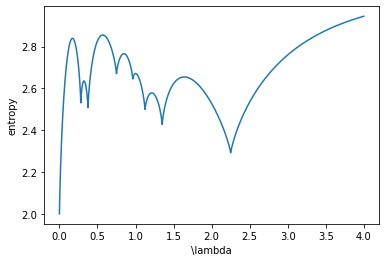

In [4]:
max_lamb = 4
lam_list, chi_list = GP.var_phase(max_lamb)

plt.plot(lam_list, chi_list)
plt.xlabel('\lambda')
plt.ylabel('entropy')

Derivatives of phase diagram.

In [5]:
dev1, dev2, m_index = GP.dev(lam_list, chi_list)

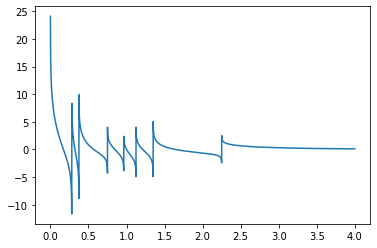

In [6]:
plt.plot(lam_list[:-1], dev1)

transitions at [0.28  0.374 0.749 0.963 1.124 1.349 2.249]


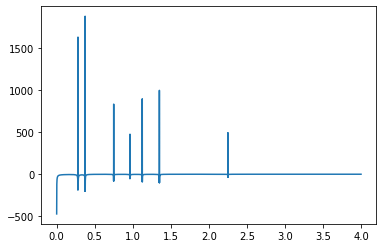

In [7]:
plt.plot(lam_list[:-2], dev2) #dev2 adjusted by 10
print('transitions at', m_index)

Reduced weight lists for chosen lambdas. You can do manual verification using this.

In [8]:
l_chosen, w_red = GP.verify_list(m_index, lam_list)

print('choose lambda at', l_chosen)
print('reduced weight', w_red)

choose lambda at [0.14, 0.327, 0.5615, 0.856, 1.0435, 1.2365, 1.799, 3.124]
reduced weight [array([ 0.33359684, -0.5972332 , -0.26422925,  0.4027668 , -0.15256917,
       -0.29189723,  0.30592885,  0.19426877,  0.12509881, -0.05573123]), array([ 0.26487603, -0.59436983, -0.17546488,  0.40563017, -0.20697314,
       -0.23176653,  0.20857438,  0.24008264,  0.09932851, -0.00991736]), array([ 0.20023718, -0.59167655, -0.09197302,  0.40832345, -0.25814557,
       -0.17520753,  0.11700267,  0.28317521,  0.07508894,  0.03317521]), array([ 0.140737  , -0.58919738, -0.01511863,  0.41080262, -0.30524987,
       -0.12314488,  0.03271075,  0.322842  ,  0.05277638,  0.072842  ]), array([ 0.11127507, -0.58796979,  0.02293636,  0.41203021, -0.3285739 ,
       -0.09736569, -0.00902698,  0.34248328,  0.04172815,  0.09248328]), array([ 0.08583527, -0.5869098 ,  0.0557961 ,  0.4130902 , -0.34871374,
       -0.07510586, -0.04506669,  0.35944315,  0.03218823,  0.10944315]), array([ 0.03084815, -0.58461867,

Calculate maximum weight by calcuating for every lambda.

In [9]:
w_tot_list = []
L_list = []

for w_reduced in w_red:
    I, w_tot = GP.total_weight(G, w_reduced, weight)
    L_list.append(I)
    w_tot_list.append(w_tot)

max_index = w_tot_list.index(max(w_tot_list))
print('all calculated weights', w_tot_list)
print('maximum weight is ', max(w_tot_list))
print('chosen nodes are', L_list[max_index])

all calculated weights [27, 27, 27, 30, 30, 30, 30, 27]
maximum weight is  30
chosen nodes are [1, 4, 5, 8]


Plot real phase diagram (for small graph).

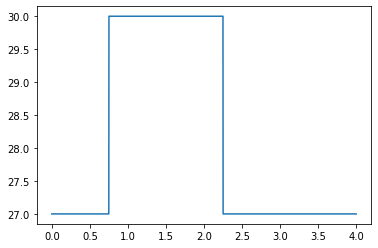

In [10]:
w_list = GP.phase_all(G, lam_list)
plt.plot(lam_list, w_list)

In [11]:
real_transitions = find_peaks(np.diff(w_list))[0]/1000
print(real_transitions)


[0.749]


Check if it is in the pervious set of transition points.

In [12]:
real_transitions = [round(i,2) for i in real_transitions]
m_index = [round(i,2) for i in m_index]
for i in real_transitions:
    if i in m_index:
        print(True)
    else:
        print(i, 'is not a transtion.')

True
